# 3. Lineární algebra

In [5]:
import numpy
import time
from matplotlib import pyplot

# časovač
def timer(funkce, *argument):
    start_timer = time.perf_counter_ns()
    vysledek = funkce(*argument)
    end_timer = time.perf_counter_ns()
    return (end_timer - start_timer) * 1_000_000, vysledek

In [2]:
# Jacobiho iterační metoda
def jacobi(A, b, pocet_iteraci, tolerance):
    x = numpy.ones(len(A))
    D = numpy.diag(A)
    L = numpy.tril(A, k= -1)
    U = numpy.triu(A, k= 1)
    old_x = 0
    for i in range(pocet_iteraci):
        x = (b - numpy.matmul((L + U), x)) / D
        #pokud je rozdíl součtů současnýho a minulého výsledku menší než tolerance, tak považujeme výsledek za dostatečně přesný
        if numpy.abs(numpy.sum(x) - numpy.sum(old_x)) < tolerance:
             return x
        old_x = x
    return x

# funkce na generování diagonálně dominantní matice
def diag_dom_matice(velikost):
        A = numpy.random.randint(1, 9, (velikost, velikost))
        b = numpy.random.randint(1, 9, velikost)
        A = A + ((numpy.eye(len(A))) * (velikost - 1) * 9)
        return A, b

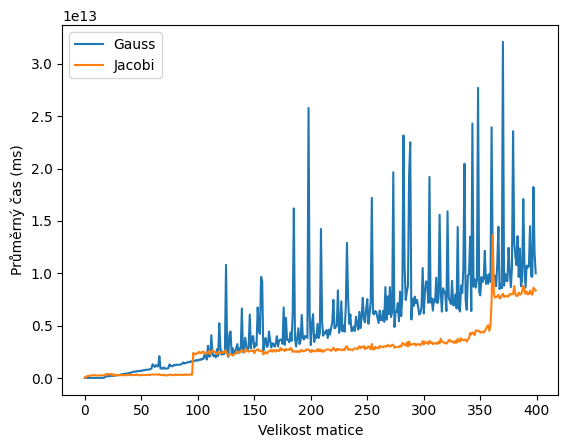

In [15]:

velikost_matic = 400
prumer_casy_gauss = []
prumer_casy_jacobi = []
for i in range(velikost_matic):
    casy_gauss = []
    casy_jacobi = []
    for y in range(5):
        A, b = diag_dom_matice(i)
        cas_gauss, vysledek_gauss = timer(numpy.linalg.solve, A, b)
        cas_jacobi, vysledek_jacobi = timer(jacobi, A, b, 20, 0.0001)
        casy_gauss.append(cas_gauss)
        casy_jacobi.append(cas_jacobi)   
    prumer_casy_gauss.append(numpy.mean(casy_gauss))
    prumer_casy_jacobi.append(numpy.mean(casy_jacobi))

pyplot.plot(prumer_casy_gauss, label="Gauss")
pyplot.plot(prumer_casy_jacobi, label="Jacobi")
pyplot.xlabel("Velikost matice")
pyplot.ylabel("Průměrný čas (ms)")
pyplot.legend()
pyplot.show()